In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('df_columnas_nuevas.csv', index_col = 0)

In [46]:
pd.options.display.max_columns=None
df.head(2)

,index,age,gender,pais,nivel_educativo,puesto_actual,experiencia_program,lenguaje_recomendado_inic,sector_actual,tamaño_empresa,equipo_data_tamaño,ML_uso,salario_anual,DA_usos,lenguajes_habitual,BD_usos,IE_usos,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999","Local development environments (RStudio, Jupyt...","Python, R",PostgreSQL,None,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Storage (GCS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,"6

<AxesSubplot:xlabel='lenguaje_recomendado_inic', ylabel='count'>

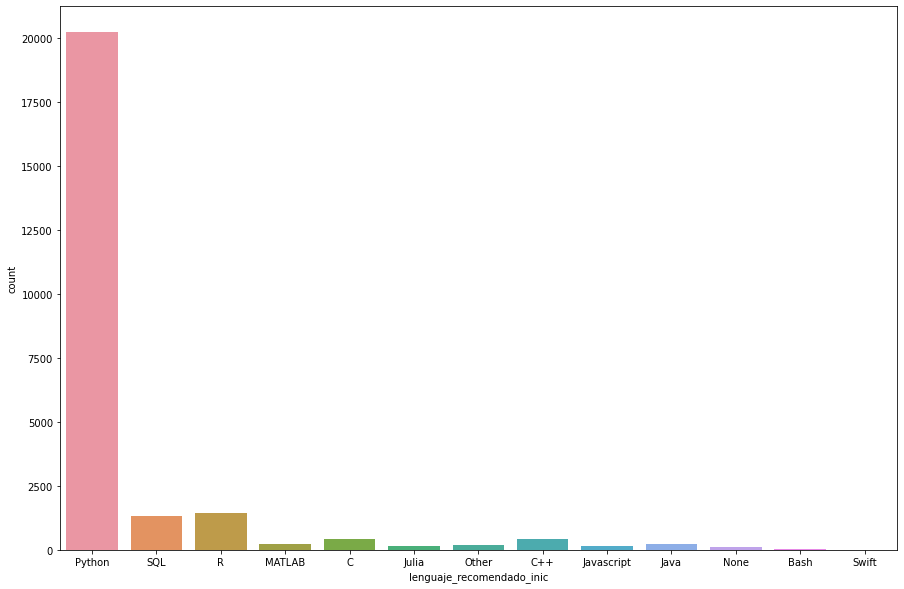

In [47]:
# QUE LENGUAJE RECOMIENDAS A PERSONAS QUE SE ESTEN INICIANDO ?

plt.figure(figsize=(15,10))
sns.countplot(data= df, x='lenguaje_recomendado_inic')

In [48]:
# UNION DE LAS COLUMNAS POR PARTES Q36A, Q38B, Q29A, Q30AM Q31A, Q27B, Q31B .... 

In [49]:
df=df.fillna("NAN")
df=df.astype('str')

In [50]:
df["Q40"] = df[['Q40_Part_1', 'Q40_Part_2', 'Q40_Part_3', 'Q40_Part_4', 'Q40_Part_5', 'Q40_Part_6','Q40_Part_7', 'Q40_Part_8', 'Q40_Part_9', 'Q40_Part_10', 'Q40_Part_11', 'Q40_OTHER']].agg('_'.join, axis=1)
df['Q40'] = df['Q40'].str.replace('NAN,', '')
df['Q40'] = df['Q40'].str.replace(',NAN', '')
df['Q40'] = df['Q40'].str.replace('NAN', '')
df['Q40'] = df['Q40'].apply(lambda x: x.split('_'))

In [51]:
df = df.explode('Q40')

In [52]:
df['Q40'].unique()

array(['Coursera', 'edX', 'Kaggle Learn Courses', 'DataCamp', '',
       'Udacity', 'Udemy',
       'Cloud-certification programs (direct from AWS, Azure, GCP, or similar)',
       'University Courses (resulting in a university degree)',
       'LinkedIn Learning', 'None', 'Other', 'Fast.ai'], dtype=object)

In [53]:
df= df.apply(lambda x: x.replace('NAN', np.nan))

In [54]:
df.drop(columns= ['Q40_Part_1', 'Q40_Part_2', 'Q40_Part_3', 'Q40_Part_4', 'Q40_Part_5', 'Q40_Part_6','Q40_Part_7', 'Q40_Part_8', 'Q40_Part_9', 'Q40_Part_10', 'Q40_Part_11', 'Q40_OTHER'], axis=1, inplace = True)

In [55]:
list(df.columns)

['index',
 'age',
 'gender',
 'pais',
 'nivel_educativo',
 'puesto_actual',
 'experiencia_program',
 'lenguaje_recomendado_inic',
 'sector_actual',
 'tamaño_empresa',
 'equipo_data_tamaño',
 'ML_uso',
 'salario_anual',
 'DA_usos',
 'lenguajes_habitual',
 'BD_usos',
 'IE_usos',
 'Q18_Part_1',
 'Q18_Part_2',
 'Q18_Part_3',
 'Q18_Part_4',
 'Q18_Part_5',
 'Q18_Part_6',
 'Q18_OTHER',
 'Q19_Part_1',
 'Q19_Part_2',
 'Q19_Part_3',
 'Q19_Part_4',
 'Q19_Part_5',
 'Q19_OTHER',
 'Q27_A_Part_10',
 'Q27_A_Part_11',
 'Q27_A_OTHER',
 'Q29_A_Part_1',
 'Q29_A_Part_2',
 'Q29_A_Part_3',
 'Q29_A_Part_4',
 'Q29_A_OTHER',
 'Q30_A_Part_1',
 'Q30_A_Part_2',
 'Q30_A_Part_3',
 'Q30_A_Part_4',
 'Q30_A_Part_5',
 'Q30_A_Part_6',
 'Q30_A_Part_7',
 'Q30_A_OTHER',
 'Q31_A_Part_1',
 'Q31_A_Part_2',
 'Q31_A_Part_3',
 'Q31_A_Part_4',
 'Q31_A_Part_5',
 'Q31_A_Part_6',
 'Q31_A_Part_7',
 'Q31_A_Part_8',
 'Q31_A_Part_9',
 'Q31_A_OTHER',
 'Q36_A_Part_1',
 'Q36_A_Part_2',
 'Q36_A_Part_3',
 'Q36_A_Part_4',
 'Q36_A_Part_5',
 'Q3

In [56]:
lista = ['index', 'age', 'gender', 'pais', 'nivel_educativo', 'puesto_actual', 'experiencia_program','Q40',  'sector_actual', 'tamaño_empresa', 'equipo_data_tamaño',  'salario_anual',  
 'lenguaje_recomendado_inic',
 'ML_uso',
 'DA_usos',
 'lenguajes_habitual',
 'BD_usos',
 'IE_usos',
 'Q18_Part_1',
 'Q18_Part_2',
 'Q18_Part_3',
 'Q18_Part_4',
 'Q18_Part_5',
 'Q18_Part_6',
 'Q18_OTHER',
 'Q19_Part_1',
 'Q19_Part_2',
 'Q19_Part_3',
 'Q19_Part_4',
 'Q19_Part_5',
 'Q19_OTHER',
 'Q27_A_Part_10',
 'Q27_A_Part_11',
 'Q27_A_OTHER',
 'Q29_A_Part_1',
 'Q29_A_Part_2',
 'Q29_A_Part_3',
 'Q29_A_Part_4',
 'Q29_A_OTHER',
 'Q30_A_Part_1',
 'Q30_A_Part_2',
 'Q30_A_Part_3',
 'Q30_A_Part_4',
 'Q30_A_Part_5',
 'Q30_A_Part_6',
 'Q30_A_Part_7',
 'Q30_A_OTHER',
 'Q31_A_Part_1',
 'Q31_A_Part_2',
 'Q31_A_Part_3',
 'Q31_A_Part_4',
 'Q31_A_Part_5',
 'Q31_A_Part_6',
 'Q31_A_Part_7',
 'Q31_A_Part_8',
 'Q31_A_Part_9',
 'Q31_A_OTHER',
 'Q36_A_Part_1',
 'Q36_A_Part_2',
 'Q36_A_Part_3',
 'Q36_A_Part_4',
 'Q36_A_Part_5',
 'Q36_A_Part_6',
 'Q36_A_Part_7',
 'Q36_A_OTHER',
 'Q37_A_Part_1',
 'Q37_A_Part_2',
 'Q37_A_Part_3',
 'Q37_A_Part_4',
 'Q37_A_Part_5',
 'Q37_A_Part_6',
 'Q37_A_Part_7',
 'Q37_A_OTHER',
 'Q38_A_Part_1',
 'Q38_A_Part_2',
 'Q38_A_Part_3',
 'Q38_A_Part_4',
 'Q38_A_Part_5',
 'Q38_A_Part_6',
 'Q38_A_Part_7',
 'Q38_A_Part_8',
 'Q38_A_Part_9',
 'Q38_A_Part_10',
 'Q38_A_Part_11',
 'Q38_A_OTHER',
 'Q39_Part_1',
 'Q39_Part_2',
 'Q39_Part_3',
 'Q39_Part_4',
 'Q39_Part_5',
 'Q39_Part_6',
 'Q39_Part_7',
 'Q39_Part_8',
 'Q39_Part_9',
 'Q39_OTHER',
 'Q27_B_Part_1',
 'Q27_B_Part_2',
 'Q27_B_Part_3',
 'Q27_B_Part_4',
 'Q27_B_Part_5',
 'Q27_B_Part_6',
 'Q27_B_Part_7',
 'Q27_B_Part_8',
 'Q27_B_Part_9',
 'Q27_B_Part_10',
 'Q27_B_Part_11',
 'Q27_B_OTHER',
 'Q29_B_Part_1',
 'Q29_B_Part_2',
 'Q29_B_Part_3',
 'Q29_B_Part_4',
 'Q29_B_OTHER',
 'Q30_B_Part_1',
 'Q30_B_Part_2',
 'Q30_B_Part_3',
 'Q30_B_Part_4',
 'Q30_B_Part_5',
 'Q30_B_Part_6',
 'Q30_B_Part_7',
 'Q30_B_OTHER',
 'Q31_B_Part_1',
 'Q31_B_Part_2',
 'Q31_B_Part_3',
 'Q31_B_Part_4',
 'Q31_B_Part_5',
 'Q31_B_Part_6',
 'Q31_B_Part_7',
 'Q31_B_Part_8',
 'Q31_B_Part_9',
 'Q31_B_OTHER',
 'Q32_B_Part_1',
 'Q32_B_Part_2',
 'Q32_B_Part_3',
 'Q32_B_Part_4',
 'Q32_B_Part_5',
 'Q32_B_Part_6',
 'Q32_B_Part_7',
 'Q32_B_Part_8',
 'Q32_B_Part_9',
 'Q32_B_Part_10',
 'Q32_B_Part_11',
 'Q32_B_Part_12',
 'Q32_B_Part_13',
 'Q32_B_Part_14',
 'Q32_B_Part_15',
 'Q32_B_Part_16',
 'Q32_B_Part_17',
 'Q32_B_Part_18',
 'Q32_B_Part_19',
 'Q32_B_Part_20',
 'Q32_B_OTHER',
 'Q34_B_Part_1',
 'Q34_B_Part_2',
 'Q34_B_Part_3',
 'Q34_B_Part_4',
 'Q34_B_Part_5',
 'Q34_B_Part_6',
 'Q34_B_Part_7',
 'Q34_B_Part_8',
 'Q34_B_Part_9',
 'Q34_B_Part_10',
 'Q34_B_Part_11',
 'Q34_B_Part_12',
 'Q34_B_Part_13',
 'Q34_B_Part_14',
 'Q34_B_Part_15',
 'Q34_B_Part_16',
 'Q34_B_OTHER',
 'Q36_B_Part_1',
 'Q36_B_Part_2',
 'Q36_B_Part_3',
 'Q36_B_Part_4',
 'Q36_B_Part_5',
 'Q36_B_Part_6',
 'Q36_B_Part_7',
 'Q36_B_OTHER',
 'Q37_B_Part_1',
 'Q37_B_Part_2',
 'Q37_B_Part_3',
 'Q37_B_Part_4',
 'Q37_B_Part_5',
 'Q37_B_Part_6',
 'Q37_B_Part_7',
 'Q37_B_OTHER',
 'Q38_B_Part_1',
 'Q38_B_Part_2',
 'Q38_B_Part_3',
 'Q38_B_Part_4',
 'Q38_B_Part_5',
 'Q38_B_Part_6',
 'Q38_B_Part_7',
 'Q38_B_Part_8',
 'Q38_B_Part_9',
 'Q38_B_Part_10',
 'Q38_B_Part_11',
 'Q38_B_OTHER']

In [57]:
df = df.reindex(columns=lista)

In [58]:
df.to_csv("para_eda_b1.csv")

In [ ]:
# de momento unimos hasta aqui

In [18]:
df["Q36A"] = df[["Q36_A_Part_1","Q36_A_Part_2","Q36_A_Part_3","Q36_A_Part_4","Q36_A_Part_5","Q36_A_Part_6","Q36_A_Part_7","Q36_A_OTHER"]].agg('_'.join, axis=1)
df['Q36A'] = df['Q36A'].str.replace('NAN,', '')
df['Q36A'] = df['Q36A'].str.replace(',NAN', '')
df['Q36A'] = df['Q36A'].apply(lambda x: x.split('_'))

In [19]:
df = df.explode('Q36A')

In [20]:
df["Q38B"] = df[["Q38_B_Part_1", "Q38_B_Part_2", "Q38_B_Part_3", "Q38_B_Part_4", "Q38_B_Part_5", "Q38_B_Part_6", "Q38_B_Part_7", "Q38_B_Part_8", "Q38_B_Part_9", "Q38_B_Part_10", "Q38_B_Part_11", "Q38_B_OTHER"]].agg('_'.join, axis=1)
df['Q38B'] = df['Q38B'].str.replace('NAN,', '')
df['Q38B'] = df['Q38B'].str.replace(',NAN', '')
df['Q38B'] = df['Q38B'].apply(lambda x: x.split('_'))

In [21]:
df = df.explode('Q38B')

In [22]:
df["Q29A"] = df[['Q29_A_Part_1', 'Q29_A_Part_2', 'Q29_A_Part_3', 'Q29_A_Part_4', 'Q29_A_OTHER']].agg(','.join, axis=1)
df['Q29A'] = df['Q29A'].str.replace('NAN,', '')
df['Q29A'] = df['Q29A'].str.replace(',NAN', '')
df['Q29A'] = df['Q29A'].apply(lambda x: x.split(','))

In [23]:
df = df.explode('Q29A')

In [24]:
df["Q30A"] = df[["Q30_A_Part_1", "Q30_A_Part_2", "Q30_A_Part_3", "Q30_A_Part_4", "Q30_A_Part_5", "Q30_A_Part_6", "Q30_A_Part_7", "Q30_A_OTHER"]].agg(','.join, axis=1)
df['Q30A'] = df['Q30A'].str.replace('NAN,', '')
df['Q30A'] = df['Q30A'].str.replace(',NAN', '')
df['Q30A'] = df['Q30A'].apply(lambda x: x.split(','))

In [25]:
df = df.explode('Q30A')

In [26]:
df["Q31A"] = df[["Q31_A_Part_1", "Q31_A_Part_2", "Q31_A_Part_3", "Q31_A_Part_4", "Q31_A_Part_5", "Q31_A_Part_6", "Q31_A_Part_7", "Q31_A_Part_8", "Q31_A_Part_9", "Q31_A_OTHER"]].agg(','.join, axis=1)
df['Q31A'] = df['Q31A'].str.replace('NAN,', '')
df['Q31A'] = df['Q31A'].str.replace(',NAN', '')
df['Q31A'] = df['Q31A'].apply(lambda x: x.split(','))

In [27]:
df = df.explode('Q31A')

In [28]:
df["27B_union"] = df[['Q27_B_Part_1', 'Q27_B_Part_2', 'Q27_B_Part_3', 'Q27_B_Part_4','Q27_B_Part_5','Q27_B_Part_6', 'Q27_B_Part_7','Q27_B_Part_8','Q27_B_Part_9','Q27_B_Part_10','Q27_B_Part_11','Q27_B_OTHER']].agg(','.join, axis=1)
df['27B_union'] = df['27B_union'].str.replace('NAN,', '')
df['27B_union'] = df['27B_union'].str.replace(',NAN', '')
df['27B_union'] = df['27B_union'].apply(lambda x: x.split(','))

In [29]:
df =df.explode("27B_union")

KeyboardInterrupt: 

In [ ]:
df["29B_union"] = df[['Q29_B_Part_1', 'Q29_B_Part_2', 'Q29_B_Part_3', 'Q29_B_Part_4','Q29_B_OTHER']].agg(','.join, axis=1)
df['29B_union'] = df['29B_union'].str.replace('NAN,', '')
df['29B_union'] = df['29B_union'].str.replace(',NAN', '')
df['29B_union'] = df['29B_union'].apply(lambda x: x.split(','))

In [ ]:
df =df.explode("29B_union")

In [ ]:
df= df.apply(lambda x: x.replace('NAN', np.nan))

NameError: name 'df' is not defined

In [ ]:
df.to_csv('df_union_1.csv')

NameError: name 'df' is not defined

A partir de aquí mi ordenador no puede más

In [ ]:
df["31B_union"] = df[['Q31_B_Part_1', 'Q31_B_Part_2', 'Q31_B_Part_3', 'Q31_B_Part_4','Q31_B_Part_5','Q31_B_Part_6', 'Q31_B_Part_7','Q31_B_Part_8','Q31_B_Part_9','Q31_B_OTHER']].agg(','.join, axis=1)
df["31B_union"] = df["31B_union"].str.replace('NAN,', '')
df["31B_union"] = df["31B_union"].str.replace(',NAN', '')
df["31B_union"] = df["31B_union"].apply(lambda x: x.split(','))

In [ ]:
df =df.explode("31B_union")

: 

: 

In [ ]:
df

<AxesSubplot:xlabel='Q29A', ylabel='count'>

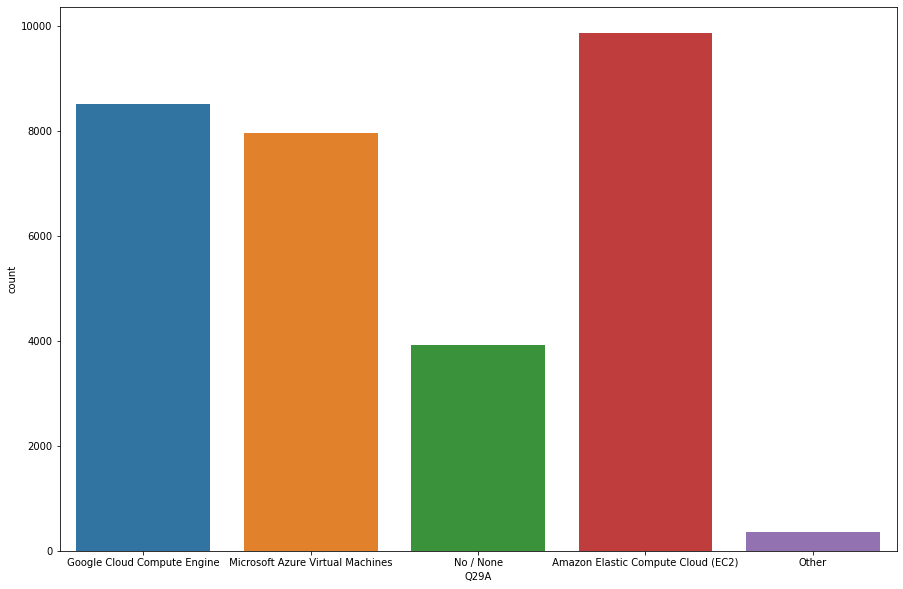

In [ ]:
# USAS ALGUNAS DE ESTAS PLATAFORMAS DE LA NUBE? 

plt.figure(figsize=(15,10))
sns.countplot(data= df, x='Q29A')

In [ ]:
list(df.columns)

['Unnamed: 0',
 'index',
 'age',
 'gender',
 'pais',
 'nivel_educativo',
 'puesto_actual',
 'experiencia_program',
 'lenguaje_recomendado_inic',
 'sector_actual',
 'tamaño_empresa',
 'equipo_data_tamaño',
 'ML_uso',
 'salario_anual',
 'DA_usos',
 'lenguajes_habitual',
 'BD_usos',
 'IE_usos',
 'Q18_Part_1',
 'Q18_Part_2',
 'Q18_Part_3',
 'Q18_Part_4',
 'Q18_Part_5',
 'Q18_Part_6',
 'Q18_OTHER',
 'Q19_Part_1',
 'Q19_Part_2',
 'Q19_Part_3',
 'Q19_Part_4',
 'Q19_Part_5',
 'Q19_OTHER',
 'Q27_A_Part_10',
 'Q27_A_Part_11',
 'Q27_A_OTHER',
 'Q29_A_Part_1',
 'Q29_A_Part_2',
 'Q29_A_Part_3',
 'Q29_A_Part_4',
 'Q29_A_OTHER',
 'Q30_A_Part_1',
 'Q30_A_Part_2',
 'Q30_A_Part_3',
 'Q30_A_Part_4',
 'Q30_A_Part_5',
 'Q30_A_Part_6',
 'Q30_A_Part_7',
 'Q30_A_OTHER',
 'Q31_A_Part_1',
 'Q31_A_Part_2',
 'Q31_A_Part_3',
 'Q31_A_Part_4',
 'Q31_A_Part_5',
 'Q31_A_Part_6',
 'Q31_A_Part_7',
 'Q31_A_Part_8',
 'Q31_A_Part_9',
 'Q31_A_OTHER',
 'Q36_A_Part_1',
 'Q36_A_Part_2',
 'Q36_A_Part_3',
 'Q36_A_Part_4',
 'Q36_

In [ ]:
df

NameError: name 'df' is not defined